University of Fribourg

Departement of Informatics

SS 2017

*********************
# Pattern Recognition

## First Classification Task with KNN

#### Exercise 1a - 20 February 2017

#### Deadline: 06.03.2017



## Instructions

The aim of this exercise is to implement your first classifier and apply it to the popular MNIST
dataset, which contains images of handwritten digits.

In this exercise, your task is to implement the KNN algorithm and test it on the dataset.

### Data and Features

On Ilias you find two csv files (train.csv, test.csv). The csv-files contain the labels (drawn
number) and pixel values for 28 × 28 grayscale images with pixel values in the range of [0-255].
The images are represented as one-dimensional arrays so you need to reshape the data if you
want to display the images on the screen.

As features we will use the pixel values and will not compute any other features (although you
certainly can if you like to).

### KNN

Create your own implementation of the KNN algorithm (see lecture notes). Classify the entries
of the dataset using KNN. Experiment with diferent values of K. Aim for a fast implementation
as the dataset is of considerable size.

Implement at least two diferent distance metrics (e.g. Euclidean and Manhattan) and evaluate
which one works best for you.

### Expected Output

* Source Code of your implementation.
* Accuracy of your classification for K = {1, 3, 5, 10, 15} using the best distance metric.



# Commented Source Code

In [212]:
import time
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

## Preprocess the data

* Read csv files (test and train)
* Make rows names more readable
* Visualize raw data

In [213]:
# Make rows names more readable
def new_columns_names(columns_size):
    new_columns_array = np.array(['label'])

    for i in range(1,size):
        new_name = 'pixel'+ str(i)
        new_columns_array = np.append(new_columns_array, [new_name])
        
    return new_columns_array

# Read csv files
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

#Create the corresponding data frames
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)

#Size of columns array must be the same between training data and test data
size = len(train_df.columns.values)

#Compute the new data frame
train_df.columns = new_columns_names(size)
test_df.columns =  new_columns_names(size)

#Print the shape (#row, #columns) of the two sets
print(train_df.shape, train_df.shape)

#Train data frame head
train_df.head()

(26998, 785) (26998, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Visualize hadwritten numbers images from test data

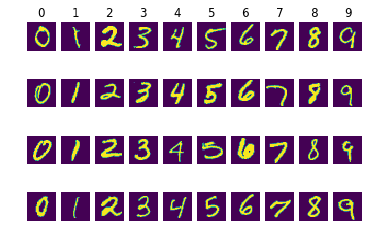

In [214]:
labels = ['0','1','2','3','4','5','6','7','8','9']
labels_size = len(labels)
handwritten_numbers = 4

#take 
for y, lab in enumerate(labels):
    index = np.nonzero([i == y for i in y_test])
    index = np.random.choice(index[0], handwritten_numbers, replace = False)
    for i, index in enumerate(index):
        plt_index = i * labels_size + y + 1
        plt.subplot(handwritten_numbers, labels_size, plt_index)
        plt.imshow(X_test[index].reshape((28, 28)))
        plt.axis("off")
        if i == 0:
            plt.title(lab)

plt.show()

In [215]:
#KNN is non-parametric, instance-based and used in a supervised learning setting.
#X_train reprensents features of our taining set --> pixels
#Y_train represents labels of our training set --> number in the image

len(train_df.ix[0].values)
train_df.values[0]
#select pixels row, put all values an array
X_train = train_df.filter(regex = ("pixel.*")).values
X_test = test_df.filter(regex = ("pixel.*")).values

y_train = train_df['label'].values
y_test = test_df['label'].values

#drop to increase time for testing the distances method accuracy
#X_test = np.delete(X_test,np.s_[100::],0)
#y_test = np.delete(y_test, np.s_[100::])

#print the sahpe
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )


(26998, 784) (15000, 784) (26998,) (15000,)


##  Core of the algorithm

* Training block
* Distances definition
* Predict block
* Define the kNN

(Inspired by [Kevin Zakka's blog](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/))

In [216]:
#Training block of the kNN, nothing to do: instance based algorithm
def train(X_train, y_train):
    #do nthing
    return

In [217]:
#Define two kind of distances
def manhattan_distance(X_train, X_test):
    #create list for distances
    distances = []
    
    for i in range(len(X_train)):
        #compute the distance
        distance = np.sum(np.abs(X_test- X_train[i,:]))
        #add it to list of distances
        distances.append([distance,i])
        
    #sort the list
    distances = sorted(distances)
    
    return distances

def euclidian_distance(X_train, X_test):
    #create list for distance
    distances = []
    
    for i in range(len(X_train)):
        #compute the distance
        distance = np.sqrt(np.sum(np.square(X_test - X_train[i,:])))
        #add it to list of distances
        distances.append([distance,i])
        
    #sort the list
    distances = sorted(distances)
    
    return distances
    

#Predict block with manhattan distance
def predict(X_train, y_train, X_test, k):
    #create list for distances and labels
    distances = manhattan_distance(X_train, X_test)
    labels = []
    #make a list of the k neighbors'targets
    for i in range(k):
        index = distances[i][1]
        labels.append(y_train[index])
    
    #return most common label
    return Counter(labels).most_common(1)[0][0]

In [218]:
#KNN
def kNN(X_train,y_train,X_test, predictions, k):
        #train on the input data
        train(X_train, y_train)
        #loop over all observations
        for i in range(len(X_test)):
            predictions.append(predict(X_train, y_train, X_test[i, :], k))

## Find the best Measure 
* Run test manually modifing the test samples
* Evaluate the results

In [207]:
#Run the algorithm on 101 test instances to define the better distance measure regarding the time and the accuracy
predictions = []

#Mesure time and run the kNN
tic = time.time()
kNN(X_train, y_train, X_test, predictions, 10)
toc = time.time()
print(toc-tic)

#transform the list into an array
predictions = np.asarray(predictions)

#Compute the accuracy 
accuracy = accuracy_score(y_test, predictions)
print('\nThe accuracy of our classifier is %d%%' % float(accuracy*100))

35.28411889076233

The accuracy of our classifier is 94%


###  Choose a distance metric: kNN on 101 test instances

| Distance Method  |k = n|  Computational time | Accuracy |
|------------------|-----|---------------------|----------|
| Euclidian        |  1  |        39,15 sec    | 93,9999% |
| Euclidian        |  3  |        39,70 sec    | 94,9999% |
| Euclidian        |  5  |        40,05 sec    | 94,9999% |
| Euclidian        |  10 |        40,29 sec    | 94,9999% |
| Euclidian        |  15 |        40,73 sec    | 93,9999% |
| Manathann        |  1  |        34.77 sec    | 93,9999% |
| Manathann        |  3  |        35,16 sec    | 95,9999% |
| Manathann        |  5  |        35,44 sec    | 95,9999% |
| Manathann        |  10 |        34,84 sec    | 93,9999% |
| Manathann        |  15 |        35,40 sec    | 93,0000% |

We choose to compute the Euclidain distance because it's the most common in the litterature for the rest of the exercice, but regarding the samples result we will try the 5-NN with manhattan distance on the whole test instances to compare the two best results. 

As previous test we can observe that the best accuracy is provide with 3/5/10-NN for the Euclidian distance and 3/5-NN for the Manhattan distance.


## Time issues

One way to cut down the curse of dimensionality of our set is to try to decompose the data and restructure it using some technics like ([Anisotropic: Interactive Intro to Dimensionality Reduction](https://www.kaggle.com/arthurtok/digit-recognizer/interactive-intro-to-dimensionality-reduction)):

* KD-tree
* Ball tree
* Principal component analysis (Inspired by [Samuel: comparing random forest, PCA and kNN](https://www.kaggle.com/sflender/digit-recognizer/comparing-random-forest-pca-and-knn))

We choos the PCA algorithm already implementend in the sklearn library

* Separate the feature space in visible cluster for 2 components
* Try to capture the most of the variance in the dataset predicting how the prediction is good regarding the number of components
* Choose a #of components avoiding overfitting, regarding the function
* Compute the transform sets with the kNN algorithm increasing the speed of the algorithm

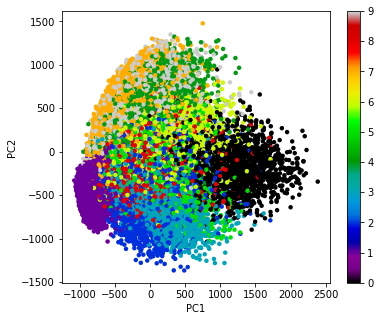

In [219]:
pca = PCA(n_components=2)
pca.fit(X_train)
transform = pca.transform(X_train)

plt.figure(figsize=(6,5))
plt.scatter(transform[:,0],transform[:,1], s=20, c = y_train, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
plt.clim(0,9)

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()


In [220]:
n_components_array=([1,2,3,4,5,10,20,50,100,200,500])
vr = np.zeros(len(n_components_array))
i=0;
for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    vr[i] = sum(pca.explained_variance_ratio_)
    i=i+1  

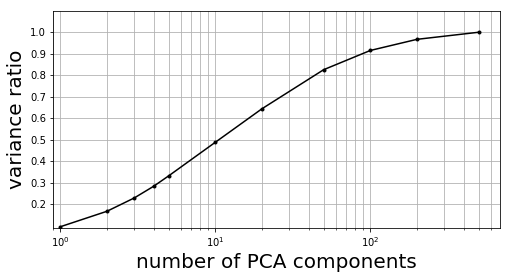

In [221]:
plt.figure(figsize=(8,4))
plt.plot(n_components_array,vr,'k.-')
plt.xscale("log")
plt.ylim(9e-2,1.1)
plt.yticks(np.linspace(0.2,1.0,9))
plt.xlim(0.9)
plt.grid(which="both")
plt.xlabel("number of PCA components",size=20)
plt.ylabel("variance ratio",size=20)

plt.show()

In [222]:
pca = PCA(n_components = 50)
pca.fit(X_train)
transform_train = pca.transform(X_train)
transform_test = pca.transform(X_test)


## Run the algorithm with the transform train and test sets

In [223]:
#Run the algorithm
predictions = []

#there divide in 10 tasks
tic = time.time()
kNN(transform_train, y_train, transform_test, predictions, 5)
toc = time.time()
print(toc-tic)

#transform the list into an array
predictions = np.asarray(predictions)

#accuracy 
accuracy = accuracy_score(y_test, predictions)
print('\nThe accuracy of our classifier is %d%%' % (accuracy*100))

2797.6031913757324

The accuracy of our classifier is 96%


In [224]:
#Save the output file
out_file= open("predictionsK5Man.csv", "w")
out_file.write("ImageID, Label, k, Distance, Accuracy\n")
for i in range(len(predictions)):
    out_file.write(str(i+1) + "," + str(int(predictions[i])) + "," + "5" + "," + "Manhattan" + "," +("%d%%" % (float(accuracy) * float(100))) + "\n")
out_file.close()


# End results over all the dataset

| Distance Method  |K = n|  Computational time | Accuracy |
|------------------|-----|---------------------|----------|
| Euclidian        |  1  |        52,59 min    | 96,9267% |
| Euclidian        |  3  |        53,38 min    | 97,0867% |
| Euclidian        |  5  |        54,74 min    | 97,0067% |
| Euclidian        |  10 |        53,24 min    | 96,6533% |
| Euclidian        |  15 |        54,74 min    | 96,4600% |
| Manathann        |  5  |        46,63 min    | 96,8200% |        

We noticed that the Euclidian distance was a good distance choice allowing to give us a better accuracy with 3-NN algorithm, but Manathann distance do a best performance time.